Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Uploading Dataset

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Visualizing

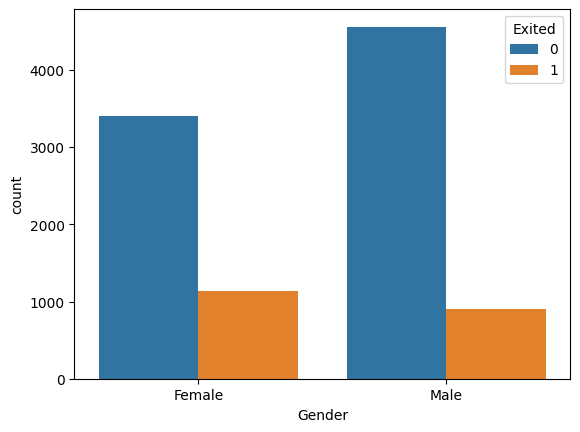

<Figure size 1000x1000 with 0 Axes>

In [4]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.figure(figsize=(10,10))
plt.show()

Data Preprocessing

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(columns='Surname')

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
 
df['Gender'] = label_encoder.fit_transform(df['Gender'])
 

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
 
df=df.drop(columns='Geography')

In [11]:

df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,42,2,0,1,1,1,101348,1
1,2,15647311,Hill,608,0,41,1,83807,1,0,1,112542,0
2,3,15619304,Onio,502,0,42,8,159660,3,1,0,113931,1
3,4,15701354,Boni,699,0,39,1,0,2,0,0,93826,0
4,5,15737888,Mitchell,850,0,43,2,125510,1,1,1,79084,0


Model Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Exited', axis=1)
y = df['Exited']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

 

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

reh=LogisticRegression()
reh.fit(X_train,y_train)
 


ValueError: could not convert string to float: 'Black'

In [18]:

reh.score(X_train,y_train)

ValueError: could not convert string to float: 'Black'

In [111]:
pred=reh.predict(X_test)
c=pred

In [112]:
scr=reh.score(X_test,y_test)
scr*100 
reg_acc=scr

Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DT = DecisionTreeClassifier(max_depth=(5), random_state=0)
DT.fit(X_train, y_train)
predict_dec= DT.predict(X_test)
predict_dec

ValueError: could not convert string to float: 'Black'

In [114]:
dt_acc=DT.score(X_test,y_test)

Random Classifier

In [115]:
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)

pred_rf = RF.predict(X_test)
pred_rf


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [116]:
random_acc=RF.score(X_test,y_test)

Visualizing All Algorithm

In [117]:
Algorithms = ['Random Forest','Descision','Logistic Regression',]
accuracy = [random_acc,dt_acc,reg_acc]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Random Forest,0.855667
1,Descision,0.860333
2,Logistic Regression,0.781000


In [1]:
plt.figure(figsize=(7, 5))

# Define custom colors
colors = ['skyblue', 'lightgreen', 'salmon']

# Plot the bar chart with custom colors
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined